# Exercise 4 - Image Filtering

## Filtering using Python

scikit-image and SciPy contain a large number of image filtering functions. In this exercise, we will explore some of the fundamental functions and touch upon more advanced filters as well.

### Filtering using correlation

We will start by exploring the basic correlation operator from SciPy. Start by importing:

In [8]:
from scipy.ndimage import correlate
import numpy as np
from skimage import io, color
import matplotlib.pyplot as plt

Now create a small and simple image

In [9]:
input_img=np.arange(25).reshape(5,5)
print(input_img)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


and a simple filter:

In [10]:
weights = [[0, 1, 0],
		   [1, 2, 1],
		   [0, 1, 0]]

Now we can correlate the image with the weights:

In [11]:
res_img = correlate(input_img, weights)
print(res_img)

[[  6  11  17  23  28]
 [ 31  36  42  48  53]
 [ 61  66  72  78  83]
 [ 91  96 102 108 113]
 [116 121 127 133 138]]


#### Exercise 1
Print the value in position (3,3) in res_img. Explain the value?

In [12]:
res_img

array([[  6,  11,  17,  23,  28],
       [ 31,  36,  42,  48,  53],
       [ 61,  66,  72,  78,  83],
       [ 91,  96, 102, 108, 113],
       [116, 121, 127, 133, 138]])

In [13]:
print({res_img[3,3]})

{108}


### Border handling

When the value of an output pixel at the boundary of the image is computed, a portion of the filter is usually outside the edge of the input image. One way to handle this, is to assume that the value of the off-the-edge pixels of the image are 0. This is called zero padding. Since 0 is the value of a black pixel, the output image will have a dark edge. Another approach is to reflect the actual pixel values of the image to the off-the-edge-pixel. This is the default behaviour of correlate. We can also set the off-the-edge-pixel to have a constant value (for example 10) by:

In [14]:
res_img = correlate(input_img, weights, mode="constant", cval=10)
print(res_img)

[[ 26  20  25  30  40]
 [ 36  36  42  48  54]
 [ 61  66  72  78  79]
 [ 86  96 102 108 104]
 [ 96 110 115 120 110]]


#### Exercise 2

Compare the output images when using reflection and constant for the boarder. Where and why do you see the differences.

In [15]:
res_img_ref = correlate(input_img, weights, mode="reflect", cval=10)
print(f"{res_img}")
print(f"{res_img_ref}")

[[ 26  20  25  30  40]
 [ 36  36  42  48  54]
 [ 61  66  72  78  79]
 [ 86  96 102 108 104]
 [ 96 110 115 120 110]]
[[  6  11  17  23  28]
 [ 31  36  42  48  53]
 [ 61  66  72  78  83]
 [ 91  96 102 108 113]
 [116 121 127 133 138]]


### Mean filtering

Now we will try some filters on an artificial image with different types of noise starting with the mean filter

#### Exercise 3
Read and show the image Gaussian.png from the exercise material

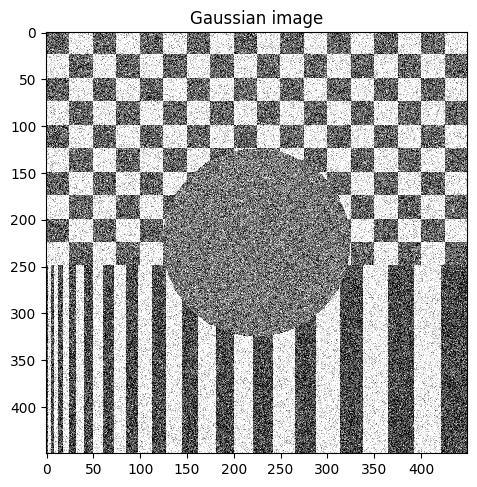

In [16]:
in_dir="data/"
im_name="Gaussian.png"
im_org=io.imread(in_dir+im_name)
io.imshow(im_org)
plt.title('Gaussian image')
io.show()

Create a mean filter with normalized weights:

In [17]:
size = 40
# Two dimensional filter filled with 1
weights = np.ones([size,size])
# Normalize weights
weights = weights / np.sum(weights)
#weights

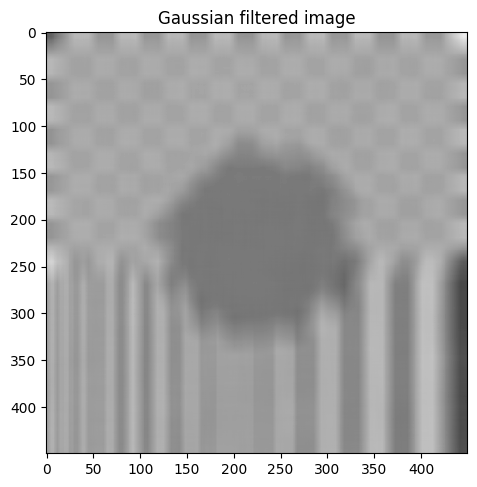

In [18]:
res_img=correlate(im_org, weights)
io.imshow(res_img)
plt.title("Gaussian filtered image")
io.show()

### Median filtering
The median filter belongs to the group of rank filters where the pixel values in a given area are sorted by value and then one of the values are picked. Here the median value of the sorted values.

Start by importing the filter:

In [19]:
from skimage.filters import median

We can create a footprint which marks the size of the median filter and do the filtering like this:

In [20]:
size = 5
footprint = np.ones([size, size])
med_img = median(im_org, footprint)

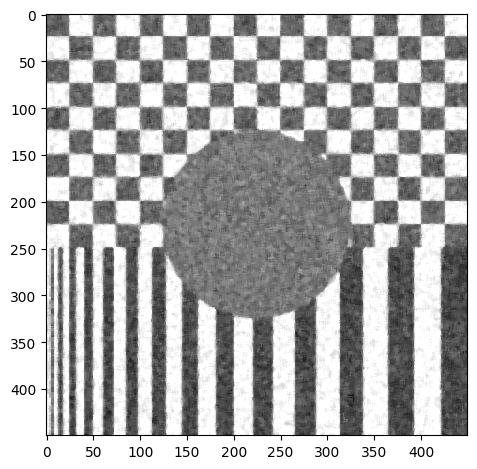

In [21]:
io.imshow(med_img)
io.show()

#### Exercise 4
Filter the Gaussian.png image with the median filter with different size (5, 10, 20...). What do you observe? What happens with the noise and with the light-dark transitions?

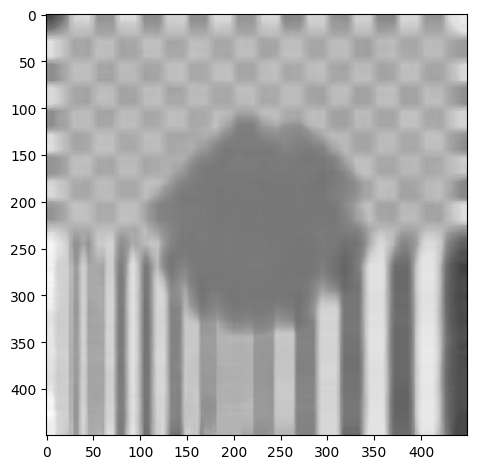

In [22]:
size = 40
footprint = np.ones([size,size])
med_img = median(im_org, footprint)
io.imshow(med_img)
io.show()

### Comparing mean and median filtering

Try to load and show the SaltPepper.png image. This image has noise consist of very dark or very light pixels

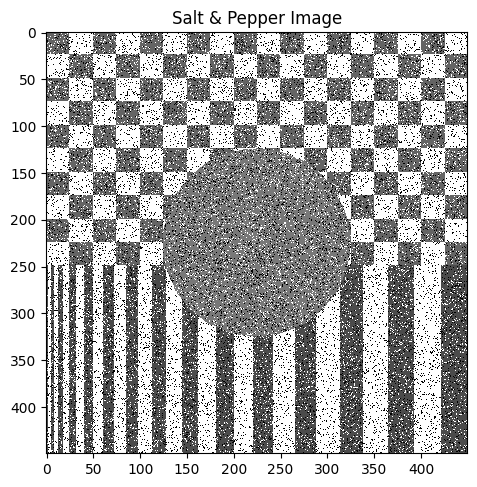

In [23]:
im_name="SaltPepper.png"
im_org=io.imread(in_dir+im_name)
io.imshow(im_org)
plt.title('Salt & Pepper Image')
io.show()

#### Exercise 5
Try to use your mean and median filter with different filter sizes on the SaltPepper.png. What do you observe? Can they remove the noise and what happens to the image?

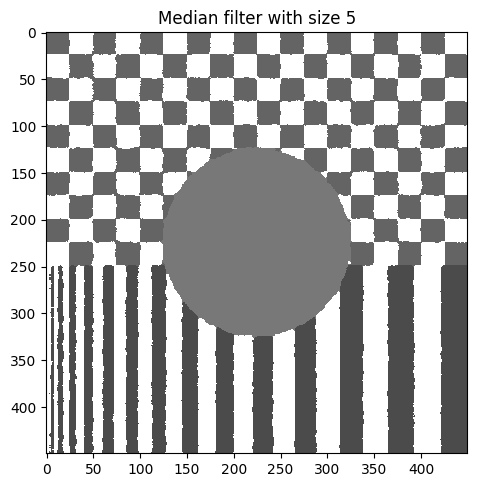

<function skimage.io._io.show()>

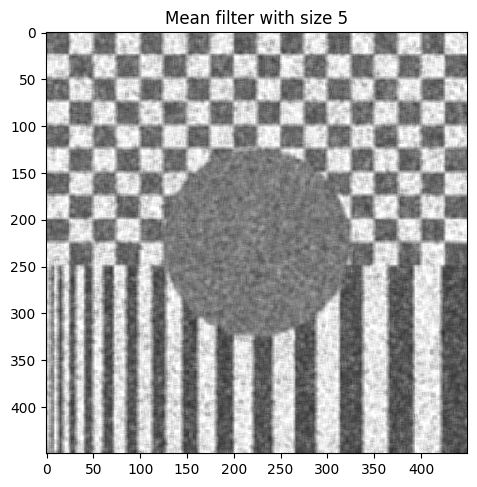

In [24]:
size = 5

footprint = np.ones([size, size])
med_img = median(im_org, footprint)
io.imshow(med_img)
plt.title(f'Median filter with size {size}')
io.show()

weights = np.ones([size, size])
weights = weights / np.sum(weights)
mean_img = correlate(im_org, weights)
io.imshow(mean_img)
plt.title(f'Mean filter with size {size}')
io.show

### Gaussian filter

Scikit-image contains many different filters.
The Gaussian filter is widely used in image processing. It is a smoothing filter that removes high frequencies from the image.


#### Exercise 6

Let us try the Gaussian filter on the Gaussian.png image. Start by importing the filter:

In [25]:
from skimage.filters import gaussian

and do the filtering:

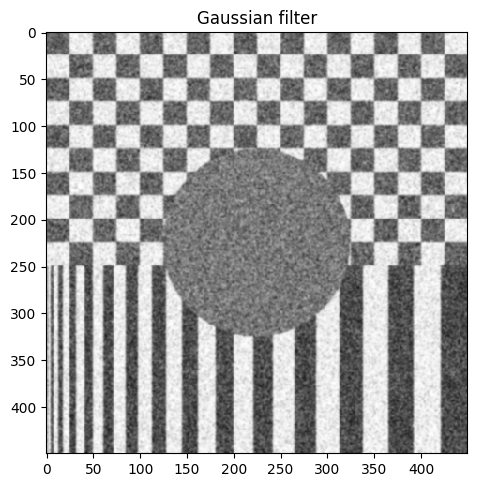

In [26]:
im_org=io.imread(in_dir + 'Gaussian.png')

sigma = 1
gauss_img = gaussian(im_org, sigma)

io.imshow(gauss_img)
plt.title('Gaussian filter')
io.show()

#### Exercise 7

Use one of your images (or use the car.png) to try the above filters. Especially, try with large filter kernels (larger than 10) with the median anf the Gaussian filter. Remember to transform your image int gray-scale before filtering.

What is the visual difference between in the output? Try to observe places where there is clear light-dark transition.

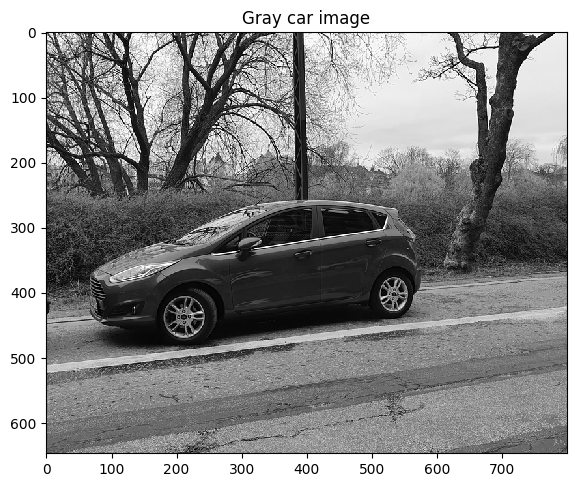

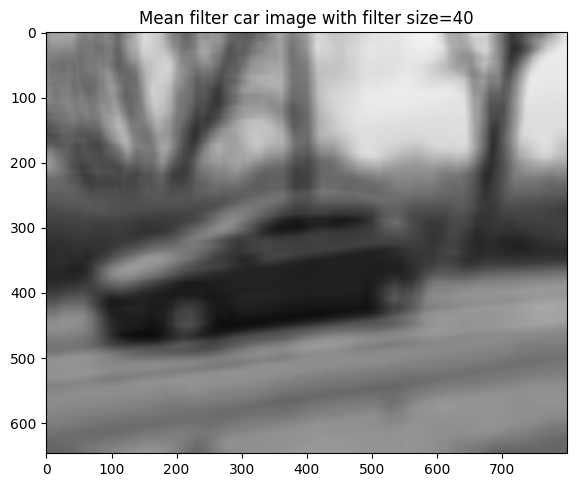

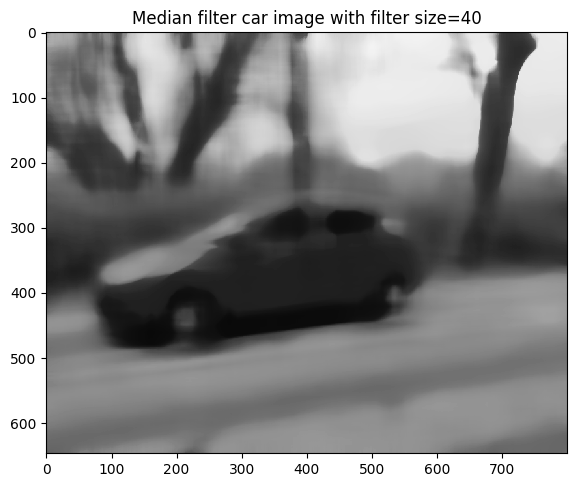

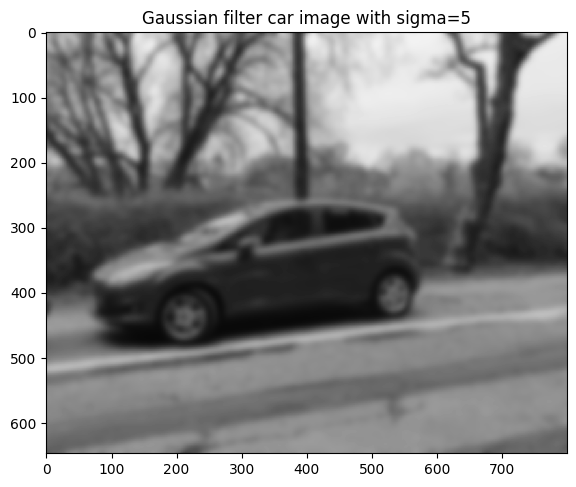

In [27]:
im_name = 'car.png'
im_car = io.imread(in_dir+im_name)

#io.imshow(im_car)
#plt.title('Original car image')
#io.show()

im_gray = color.rgb2gray(im_car)
io.imshow(im_gray)
plt.title('Gray car image')
io.show()

size = 40

# Mean filter
footprint = np.ones([size,size])
weights = footprint / np.sum(footprint)
im_mean = correlate(im_gray, weights)
io.imshow(im_mean)
plt.title(f'Mean filter car image with filter size={size}')
io.show()

# Median filter
im_median = median(im_gray, footprint)
io.imshow(im_median)
plt.title(f'Median filter car image with filter size={size}')
io.show()

#Gaussian filter
sigma = 5
im_gauss = gaussian(im_gray, sigma)
io.imshow(im_gauss)
plt.title(f'Gaussian filter car image with sigma={sigma}')
io.show()

### Edge filters

In image analysis, an edge is where there is a large transition from light pixels. It means that there is a high pixel value gradient at an edge. Since objects in an image are often of a different color than the background, the outline of the object can sometimes be found where there are edges in the image. It is therefore interesting to apply filters that can estimate the gradients in the image and using them to detect edges.

The Prewitt filter is a simple gradient estimation filter. The Python version of the Prewitt filter can estimate the horizontal gradient using the prewitt_h filter, the vertical gradient with the prewitt_v filter and the magnitude of the edge using the prewitt filter. The magnitude is computed as:

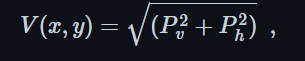

where Pv and Ph are the outputs of the vertical and horizontal Prewitt filters.

Start by importing the filter:

In [28]:
from skimage.filters import prewitt_h
from skimage.filters import prewitt_v
from skimage.filters import prewitt

#### Exercise 8

Try to filter the donald_1.png photo with the prewitt_h and prewitt_v filters and show the output without converting the output to unsigned byte. Notice that the output range is [-1,1]. Try to explain what features of the image that gets high and low values when using the two filters?

### Exercise 9 

Use the prewitt filter on donald_1.png. What do you see?

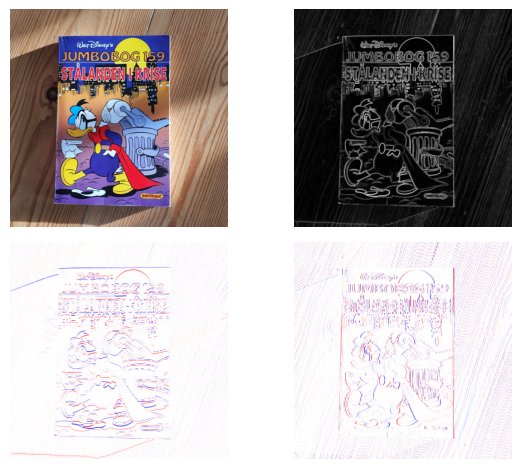

In [42]:
im_name = "donald_1.png"
im_org = io.imread(in_dir+im_name)

im_gray = color.rgb2gray(im_org)
prewitt_image = prewitt(im_gray)
prewitt_h_image = prewitt_h(im_gray)
prewitt_v_image = prewitt_v(im_gray)

fig, axes = plt.subplots(2,2)
ax = axes.ravel()
ax[0].imshow(im_org)
ax[0].axis('off')
ax[1].imshow(prewitt_image, cmap = 'gray')
ax[1].axis('off')
ax[2].imshow(prewitt_h_image, cmap = 'bwr', vmin = -1, vmax = 1)
ax[2].axis('off')
ax[3].imshow(prewitt_v_image, cmap = 'bwr', vmin = -1, vmax = 1)
ax[3].axis('off')
fig.tight_layout()
plt.show()


## Edge detection in medical images

The ElbowCTSlice.png image is one slice of a CT scan of an elbow from a person that climbed, wanted to show off, fell, landed on his arm and fractured a bone.

### Exercise 10

The goal of this exercise is to detect the edges that separates the bone from the soft tissue and the edges that separates the elbow from the background. Your detection algorithm should follow this outline:

- Read the image
- Filter the image using either a Gaussian filter or a median filter
- Compute the gradientes in the filtered image using a Prewitt filter
- Use Otus's thresholding method to compute a threshold, T, in the gradient image
- Apply the threshold, T, to the gradient image to create a binary image.

The final binary should contain the edges we are looking for. It will probably contain noise as well. We will explore methods to remove this noise later in the course. 

You should experiment and find out:
- Does the median or Gaussian filter give the best result?
- Should you use both the median and the Gaussian filter?
- What filter size gives the best result?
- What sigma in the Gaussian filter gives the best result?

__Tip__: To get a better undestanding of your output, you can use the scaled visualization and colormapping that we explored in an earlier exercise:

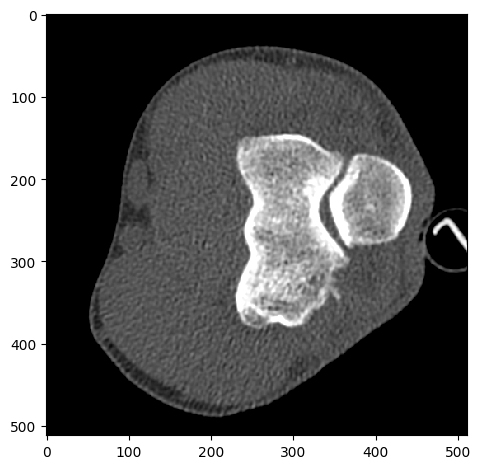

In [44]:
im_name = 'ElbowCTSlice.png'
im_org = io.imread(in_dir+im_name)
io.imshow(im_org)
io.show()

(-0.5, 511.5, 511.5, -0.5)

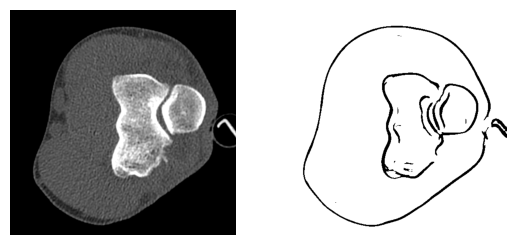

In [64]:
from skimage.filters import threshold_otsu
def detect_edges(img, filter, sigma, size):

    if filter == 'Gaussian':
        # Using Gaussian filter
        filtered_img = gaussian(img, sigma)
    elif filter == 'Median':
        # Using Median filter
        footprint = np.ones([size,size])
        filtered_img = median(img, footprint)
    elif filter == 'Both':
        # Using Gaussian filter
        footprint = np.ones([size, size])
        gauss_img = gaussian(img, sigma)
        filtered_img = median(gauss_img, footprint)
    elif filter == 'None':
        filtered_img = img
    else:
        print('Filter selected incorrectly')
        return False   
    
    # Compute the gradients using Prewitt filter
    prewitt_image = prewitt(filtered_img)

    # Compute Otsu's thresholding method
    thresh = threshold_otsu(prewitt_image)
    thresh_otsu_im = prewitt_image <=thresh    

    return thresh_otsu_im

im_name = 'ElbowCTSlice.png'
im_org = io.imread(in_dir+im_name)
edges_img = detect_edges(im_org, 'Both', 2, 20)

fig, axes = plt.subplots(1,2)
ax = axes.ravel()
ax[0].imshow(im_org, cmap = 'gray')
ax[0].axis('off')
ax[1].imshow(edges_img, cmap = 'gray')
ax[1].axis('off')

# Video filtering
Now try to make a small program, that acquires video from yout webcam/telephone, filters it and shows the filtered output. In the exercise material there is a program that can be modified.

In [1]:
from skimage import color
from skimage.util import img_as_ubyte
from skimage.util import img_as_float
from skimage.filters import prewitt
from skimage.filters import threshold_otsu
from skimage.filters import median
from skimage.filters import gaussian
import time
import cv2
import numpy as np

def show_in_moved_window(win_name, img):
    """
    Show an image in a window, where the position of the window can be given
    """
    cv2.namedWindow(win_name)
    cv2.imshow(win_name, img)


def process_gray_image(img):
    """
    Do a simple processing of an input gray scale image and return the processed image.
    # https://scikit-image.org/docs/stable/user_guide/data_types.html#image-processing-pipeline
    """
    # Do something here:
    proc_img = img.copy()
    return img_as_ubyte(proc_img)


def process_rgb_image(img):
    """
    Simple processing of a color (RGB) image
    """
    # Copy the image information so we do not change the original image
    proc_img = img.copy()
    r_comp = proc_img[:, :, 0]
    proc_img[:, :, 0] = 1 - r_comp
    return proc_img


def capture_from_camera_and_show_images():
    print("Starting image capture")

    print("Opening connection to camera")
    url = 0
    use_droid_cam = False
    if use_droid_cam:
        url = "http://192.168.1.120:4747/video"
    cap = cv2.VideoCapture(url)
    if not cap.isOpened():
        print("Cannot open camera")
        exit()

    print("Starting camera loop")
    # To keep track of frames per second using a high-performance counter
    old_time = time.perf_counter()
    fps = 0
    stop = False
    process_rgb = False
    while not stop:
        ret, new_frame = cap.read()
        if not ret:
            print("Can't receive frame. Exiting ...")
            break

        # Change from OpenCV BGR to scikit image RGB
        new_image = new_frame[:, :, ::-1]
        new_image_gray = color.rgb2gray(new_image)
        if process_rgb:
            proc_img = process_rgb_image(new_image)
            # convert back to OpenCV BGR to show it
            proc_img = proc_img[:, :, ::-1]
        else:
            proc_img = process_gray_image(new_image_gray)

        # update FPS - but do it slowly to avoid fast changing number
        new_time = time.perf_counter()
        time_dif = new_time - old_time
        old_time = new_time
        fps = fps * 0.95 + 0.05 * 1 / time_dif

        # Put the FPS on the new_frame
        str_out = f"fps: {int(fps)}"
        font = cv2.FONT_HERSHEY_COMPLEX
        cv2.putText(new_frame, str_out, (100, 100), font, 1, 255, 1)

        # Display the resulting frame
        show_in_moved_window('Input', new_frame)
        show_in_moved_window('Input gray', new_image_gray)
        show_in_moved_window('Processed image', proc_img)

        if cv2.waitKey(1) == ord('q'):
            stop = True

    print("Stopping image loop")
    cap.release()
    cv2.destroyAllWindows()


if __name__ == '__main__':
    capture_from_camera_and_show_images()

Starting image capture
Opening connection to camera
Starting camera loop
Stopping image loop


### Exercise 11
Modify the process_gray_image function in the program so it perfom a Prewitt filter on the imput image.

Also try to make it perform the automatic-edge-detection (Prewitt + Otsu) from exercise 10.

In [8]:
from skimage import color
from skimage.util import img_as_ubyte
from skimage.util import img_as_float
from skimage.filters import prewitt
from skimage.filters import threshold_otsu
from skimage.filters import median
from skimage.filters import gaussian
import time
import cv2
import numpy as np

def detect_edges(img, filter, sigma, size):

    if filter == 'Gaussian':
        # Using Gaussian filter
        filtered_img = gaussian(img, sigma)
    elif filter == 'Median':
        # Using Median filter
        footprint = np.ones([size,size])
        filtered_img = median(img, footprint)
    elif filter == 'Both':
        # Using Gaussian filter
        footprint = np.ones([size, size])
        gauss_img = gaussian(img, sigma)
        filtered_img = median(gauss_img, footprint)
    elif filter == 'None':
        filtered_img = img
    else:
        print('Filter selected incorrectly')
        return False   
    
    # Compute the gradients using Prewitt filter
    prewitt_image = prewitt(filtered_img)

    # Compute Otsu's thresholding method
    thresh = threshold_otsu(prewitt_image)
    thresh_otsu_im = prewitt_image <=thresh    

    return thresh_otsu_im

def show_in_moved_window(win_name, img):
    """
    Show an image in a window, where the position of the window can be given
    """
    cv2.namedWindow(win_name)
    cv2.imshow(win_name, img)


def process_gray_image(img):
    """
    Do a simple processing of an input gray scale image and return the processed image.
    # https://scikit-image.org/docs/stable/user_guide/data_types.html#image-processing-pipeline
    """
    # Do something here:
    sigma = 0.5
    size = 10
    proc_img = detect_edges(img, 'Gaussian', sigma, size)
    return img_as_ubyte(proc_img)


def process_rgb_image(img):
    """
    Simple processing of a color (RGB) image
    """
    # Copy the image information so we do not change the original image
    proc_img = img.copy()
    r_comp = proc_img[:, :, 0]
    proc_img[:, :, 0] = 1 - r_comp
    return proc_img


def capture_from_camera_and_show_images():
    print("Starting image capture")

    print("Opening connection to camera")
    url = 0
    use_droid_cam = False
    if use_droid_cam:
        url = "http://192.168.1.120:4747/video"
    cap = cv2.VideoCapture(url)
    if not cap.isOpened():
        print("Cannot open camera")
        exit()

    print("Starting camera loop")
    # To keep track of frames per second using a high-performance counter
    old_time = time.perf_counter()
    fps = 0
    stop = False
    process_rgb = False
    while not stop:
        ret, new_frame = cap.read()
        if not ret:
            print("Can't receive frame. Exiting ...")
            break

        # Change from OpenCV BGR to scikit image RGB
        new_image = new_frame[:, :, ::-1]
        new_image_gray = color.rgb2gray(new_image)
        if process_rgb:
            proc_img = process_rgb_image(new_image)
            # convert back to OpenCV BGR to show it
            proc_img = proc_img[:, :, ::-1]
        else:
            proc_img = process_gray_image(new_image_gray)

        # update FPS - but do it slowly to avoid fast changing number
        new_time = time.perf_counter()
        time_dif = new_time - old_time
        old_time = new_time
        fps = fps * 0.95 + 0.05 * 1 / time_dif

        # Put the FPS on the new_frame
        str_out = f"fps: {int(fps)}"
        font = cv2.FONT_HERSHEY_COMPLEX
        cv2.putText(new_frame, str_out, (100, 100), font, 1, 255, 1)

        # Display the resulting frame
        show_in_moved_window('Input', new_frame)
        show_in_moved_window('Input gray', new_image_gray)
        show_in_moved_window('Processed image', proc_img)

        if cv2.waitKey(1) == ord('q'):
            stop = True

    print("Stopping image loop")
    cap.release()
    cv2.destroyAllWindows()


if __name__ == '__main__':
    capture_from_camera_and_show_images()

Starting image capture
Opening connection to camera
Starting camera loop
Stopping image loop
